# EDA for the RF dataset

In [1]:
import rf_metric

import numpy

from matplotlib.axes import Axes
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib widget

In [9]:
data_dir = rf_metric.utils.config["RF_DATA_DIR"]
print(f"Using data directory: {data_dir}")

mod_mode = rf_metric.data.ModulationMode.ASK_4  # type: ignore
noise_level = rf_metric.data.NoiseLevel.POS_20  # type: ignore

dataset = numpy.asarray(mod_mode.read(noise_level=noise_level))  # type: ignore
print(f"Dataset shape for {mod_mode} at {noise_level}: {dataset.shape}")

x_min, x_max = dataset[:, :, 0].min(), dataset[:, :, 0].max()
y_min, y_max = dataset[:, :, 1].min(), dataset[:, :, 1].max()
print(f"x range: {x_min} to {x_max}, y range: {y_min} to {y_max}")

[x_min, x_max, y_min, y_max] = [v * 1.1 for v in [x_min, x_max, y_min, y_max]]
print(f"Adjusted ranges: x from {x_min} to {x_max}, y from {y_min} to {y_max}")

n_frames = dataset.shape[1]
print(f"Number of frames for each sample: {n_frames}")

Using data directory: /home/nishaq/Documents/research/data/rf-data
Dataset shape for ModulationMode.ASK_4 at NoiseLevel.POS_20: (4096, 1024, 2)
x range: -3.964747190475464 to 4.039209365844727, y range: -4.024225234985352 to 4.033682823181152
Adjusted ranges: x from -4.361221790313721 to 4.4431304931640625, y from -4.426647663116455 to 4.437051296234131
Number of frames for each sample: 1024


Sample 100, shape: (1024, 2)


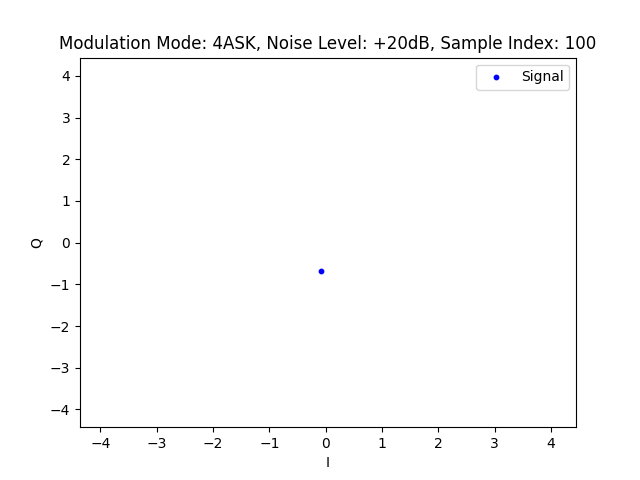

In [10]:
sample_index = 100
sample = dataset[sample_index]
print(f"Sample {sample_index}, shape: {sample.shape}")

re = sample[:, 0]
im = sample[:, 1]

fig: Figure
ax: Axes
fig, ax = plt.subplots()
ax.set_title(
    f"Modulation Mode: {mod_mode.value}, Noise Level: {noise_level.value}, Sample Index: {sample_index}"
)

scat = ax.scatter(re[0], im[0], c="b", s=10, label="Signal")
ax.set(xlim=[x_min, x_max], ylim=[y_min, y_max], xlabel="I", ylabel="Q")
ax.legend()


def sizes(frame: int) -> numpy.ndarray:
    powers = numpy.arange(frame, dtype=numpy.float32)
    powers = numpy.maximum(powers, 15)
    multipliers = numpy.pow(2, -powers)
    return 25.0 * multipliers


def update(frame: int):
    x = re[:frame]
    y = im[:frame]
    data = numpy.stack([x, y]).T
    s = sizes(frame)
    scat.set_offsets(data)
    scat.set_sizes(s)
    return (scat,)


ani = animation.FuncAnimation(fig=fig, func=update, frames=100, interval=50, blit=True)
plt.show()